In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [152]:
!ls ../theta_stats/d=mnistxkmnist*

'../theta_stats/d=mnistxkmnist-m=pstn-b=None-n=1-p=2-kl=no_annealing-prior=mean_zero_gaussian-seed=42-sigmaP=0.05-lr=0.1-lrloc=0.01':
test			train_epoch_13		train_epoch_4_sigma.p
test_mu.p		train_epoch_13_mu.p	train_epoch_5
test_sigma.p		train_epoch_13_sigma.p	train_epoch_5_mu.p
train_epoch_0		train_epoch_14		train_epoch_5_sigma.p
train_epoch_0_mu.p	train_epoch_14_mu.p	train_epoch_6
train_epoch_0_sigma.p	train_epoch_14_sigma.p	train_epoch_6_mu.p
train_epoch_1		train_epoch_1_mu.p	train_epoch_6_sigma.p
train_epoch_10		train_epoch_1_sigma.p	train_epoch_7
train_epoch_10_mu.p	train_epoch_2		train_epoch_7_mu.p
train_epoch_10_sigma.p	train_epoch_2_mu.p	train_epoch_7_sigma.p
train_epoch_11		train_epoch_2_sigma.p	train_epoch_8
train_epoch_11_mu.p	train_epoch_3		train_epoch_8_mu.p
train_epoch_11_sigma.p	train_epoch_3_mu.p	train_epoch_8_sigma.p
train_epoch_12		train_epoch_3_sigma.p	train_epoch_9
train_epoch_12_mu.p	train_epoch_4		train_epoch_9_mu.p
train_epoch_12_sigma.p	train_epoch_4_mu.p	train_

In [7]:
def load_learned_params(path, which): 
    params = pickle.load(open(path + which, 'rb'))
    params = params.reshape((-1, 2))
    return params

def plot_learned_params(params, c='blue'):
    plt.scatter(params[:, 0], params[:, 1], s=1, c=c)
    plt.axis('equal')
    
def plot_params_over_time(params_list, c='blue'):
    nr_plots = len(params_list)
    fig, ax = plt.subplots(1, nr_plots, figsize=(14, 3))
    for i in range(nr_plots):
        params = params_list[i]
        ax[i].scatter(params[:, 0], params[:, 1], s=1, c=c)
        ax[i].axis('equal')
        ax[i].set_xlim([-1, 1])
        ax[i].set_ylim([-1, 1])

## STN

In [8]:
stn_path = '../theta_stats/d=mnistxkmnist-m=stn-b=None-n=1-p=2-kl=None-seed=42-sigmaP=0.1-lr=0.1-lrloc=0.01/'

In [9]:
stn_train_0_mu = load_learned_params(stn_path, 'train_epoch_0_mu.p')
stn_train_1_mu = load_learned_params(stn_path, 'train_epoch_1_mu.p')
stn_train_5_mu = load_learned_params(stn_path, 'train_epoch_5_mu.p')
stn_train_10_mu = load_learned_params(stn_path, 'train_epoch_10_mu.p')
stn_train_14_mu = load_learned_params(stn_path, 'train_epoch_14_mu.p')
stn_test_mu = load_learned_params(stn_path, 'test_mu.p')

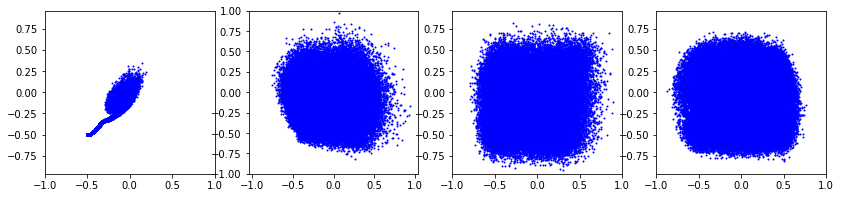

In [10]:
stn_plot_list = [stn_train_0_mu, stn_train_1_mu, stn_train_5_mu, stn_train_10_mu]
plot_params_over_time(stn_plot_list)

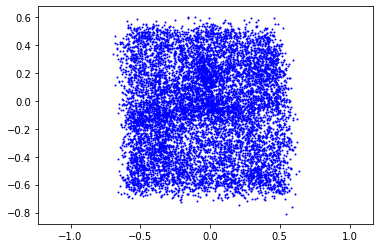

In [11]:
plot_learned_params(stn_test_mu)

## Mean zero Gaussian P-STN

In [12]:
mean_zero_pstn_path= '../theta_stats/d=mnistxkmnist-m=pstn-b=None-n=1-p=2-kl=no_annealing-prior=mean_zero_gaussian-seed=42-sigmaP=0.05-lr=0.1-lrloc=0.01/'

In [13]:
pstn_mean_0_train_0_mu = load_learned_params(mean_zero_pstn_path, 'train_epoch_0_mu.p')
pstn_mean_0_train_1_mu = load_learned_params(mean_zero_pstn_path, 'train_epoch_1_mu.p')
pstn_mean_0_train_5_mu = load_learned_params(mean_zero_pstn_path, 'train_epoch_5_mu.p')
pstn_mean_0_train_10_mu = load_learned_params(mean_zero_pstn_path, 'train_epoch_10_mu.p')
pstn_mean_0_train_14_mu = load_learned_params(mean_zero_pstn_path, 'train_epoch_14_mu.p')
pstn_mean_0_test_mu = load_learned_params(mean_zero_pstn_path, 'test_mu.p')

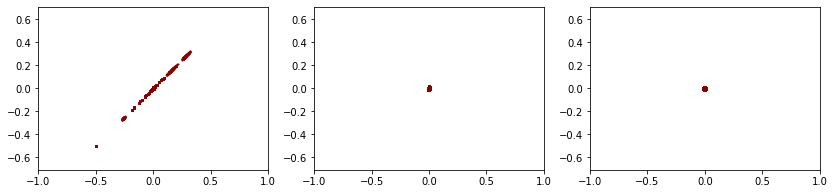

In [14]:
pstn_mean_0_plot_list = [pstn_mean_0_train_0_mu, pstn_mean_0_train_1_mu, pstn_mean_0_train_5_mu]
plot_params_over_time(pstn_mean_0_plot_list, c='darkred')

## P_STN - moving mean

In [15]:
pstn_path = '../theta_stats/d=mnistxkmnist-m=pstn-b=None-n=1-p=2-kl=no_annealing-seed=42-sigmaP=0.05-lr=0.1-lrloc=0.01/'

In [16]:
pstn_train_0_mu = load_learned_params(pstn_path, 'train_epoch_0_mu.p')
pstn_train_1_mu = load_learned_params(pstn_path, 'train_epoch_1_mu.p')
pstn_train_5_mu = load_learned_params(pstn_path, 'train_epoch_5_mu.p')
pstn_train_10_mu = load_learned_params(pstn_path, 'train_epoch_10_mu.p')
pstn_train_14_mu = load_learned_params(pstn_path, 'train_epoch_14_mu.p')
pstn_test_mu = load_learned_params(pstn_path, 'test_mu.p')

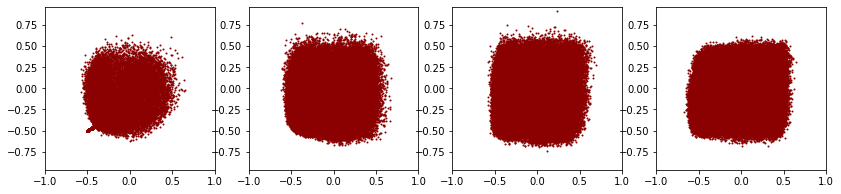

In [17]:
pstn_plot_list = [pstn_train_0_mu, pstn_train_1_mu, pstn_train_5_mu, pstn_train_10_mu]
plot_params_over_time(pstn_plot_list, c='darkred')

# Gaussian mixture prior

In [18]:
from sklearn import mixture

In [19]:
mog = mixture.GaussianMixture(n_components=8, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans')

In [20]:
mog.fit(stn_train_14_mu)

GaussianMixture(n_components=8)

(-1.0, 1.0, -1.0, 1.0)

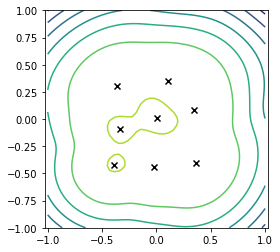

In [21]:
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)

X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
# The distribution on the variables X, Y packed into pos.
XX = np.array([X.ravel(), Y.ravel()]).T
Z = mog.score_samples(XX)
Z = Z.reshape(X.shape)
fig, ax = plt.subplots(1, figsize=(4,4))
ax.contour(X, Y, Z)
ax.scatter(mog.means_[:, 0], mog.means_[:, 1], c='k', marker='x')
ax.axis('equal')


In [167]:
means = torch.Tensor(mog.means_)
covariances = torch.Tensor(mog.covariances_)
weights = torch.Tensor(mog.weights_)

In [103]:
pickle.dump(means, open('../priors/mog_means.p', 'wb'))
pickle.dump(covariances, open('../priors/mog_covariances.p', 'wb'))
pickle.dump(weights, open('../priors/mog_weights.p', 'wb'))

In [104]:
! ls ..

checkpoints  lightning_logs  notebooks	README.md  tests	UQ
data	     loss	     options	scripts    theta_stats	utils
experiments  models	     priors	test.py    train.py


In [105]:
import torch
from torch.distributions import MultivariateNormal, kl

In [106]:
# mockup, use the first component as reference
#means = [torch.Tensor(m) for m in means]
#covariances = [torch.Tensor(c) for c in covariances]
#weights = [torch.Tensor(w) for w in weights]


q = MultivariateNormal(loc=means[0], scale_tril=covariances[0])
kl_loss = 0
for component in range(8):
    p = MultivariateNormal(loc=means[component], scale_tril=covariances[component])
    print(kl.kl_divergence(q, p))
    kl_loss += weights[component] * kl.kl_divergence(q, p)

tensor(-0.0102)
tensor(698.4714)
tensor(245.3594)
tensor(1108.5605)
tensor(295.0863)
tensor(316.2819)
tensor(1038.8759)
tensor(181.6439)


## Mog prior

In [22]:
mog_path = '../theta_stats/d=mnistxkmnist-m=pstn-b=None-n=1-p=2-kl=no_annealing-prior=mixture_of_gaussians-seed=42-sigmaP=0.05-lr=0.1-lrloc=0.01/'

In [25]:
pstn_mog_0_mu = load_learned_params(mog_path, 'train_epoch_0_mu.p')
pstn_mog_1_mu = load_learned_params(mog_path, 'train_epoch_1_mu.p')
pstn_mog_5_mu = load_learned_params(mog_path, 'train_epoch_5_mu.p')
pstn_mog_10_mu = load_learned_params(mog_path, 'train_epoch_10_mu.p')
pstn_mog_14_mu = load_learned_params(mog_path, 'train_epoch_14_mu.p')
pstn_mog_mu = load_learned_params(mog_path, 'test_mu.p')

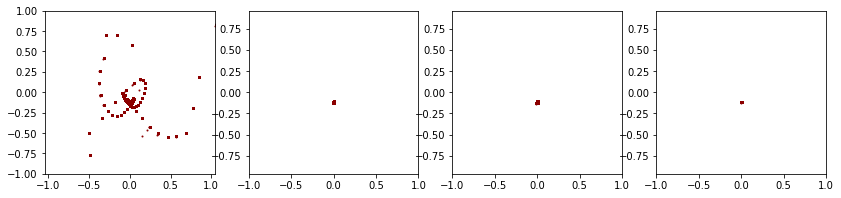

In [26]:
mog_pstn_plot_list = [pstn_mog_0_mu, pstn_mog_1_mu, pstn_mog_5_mu, pstn_mog_10_mu]
plot_params_over_time(mog_pstn_plot_list, c='darkred')

In [27]:
import torch

In [117]:
test = torch.Tensor([1]).repeat(8, 2)

In [125]:
test.shape

torch.Size([8, 2])

In [127]:
test.unsqueeze(1).repeat(1, 256, 1).shape

torch.Size([8, 256, 2])

In [39]:
test2 =  torch.tensor([0, 0.5, 1.1, 2, 3, 4, 5, 6])

In [41]:
diff = test - test2

In [128]:
diff

tensor([ 1.0000,  0.5000, -0.1000, -1.0000, -2.0000, -3.0000, -4.0000, -5.0000])

In [129]:
abs_diff = torch.norm(diff, dim=(0, 2))

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 2)

In [46]:
torch.argmin(abs_diff)

tensor(2)

In [47]:
abs_diff

tensor([1.0000, 0.5000, 0.1000, 1.0000, 2.0000, 3.0000, 4.0000, 5.0000])

In [91]:
test = torch.Tensor(pstn_mog_0_mu[:256, :]).repeat((8, 1, 1))

In [93]:
test_shape = test.shape
dummy_tensor =  torch.Tensor(np.random.sample(test_shape))
testdiff = test - dummy_tensor

In [104]:
testdiff.shape

torch.Size([8, 256, 2])

In [132]:
testdiff.shape

torch.Size([8, 256, 2])

In [134]:
testdiff[:, :1, :]

tensor([[[-1.0916, -1.1334]],

        [[-0.9478, -0.9492]],

        [[-0.8004, -0.7983]],

        [[-0.9727, -1.0249]],

        [[-0.5824, -0.8916]],

        [[-1.1590, -1.3447]],

        [[-1.1247, -0.5289]],

        [[-1.3424, -0.8445]]])

In [145]:
testabs = torch.norm(testdiff, dim=(2))[:, :3]

In [147]:
testabs

tensor([[1.5735, 1.4679, 1.1906],
        [1.3414, 1.2603, 1.3011],
        [1.1305, 1.0556, 1.6493],
        [1.4130, 1.5961, 1.6147],
        [1.0649, 1.0066, 1.0046],
        [1.7752, 1.4917, 1.7779],
        [1.2429, 1.5807, 1.4808],
        [1.5859, 1.0785, 1.0057]])

In [150]:
torch.argmin(testabs, dim=0)

tensor([4, 4, 4])

In [67]:
abs_diff = torch.abs()

TypeError: rsub() received an invalid combination of arguments - got (Tensor, numpy.ndarray), but expected one of:
 * (Tensor input, Tensor other, Number alpha)
 * (Tensor input, Number other, Number alpha)


In [154]:
torch.norm(torch.Tensor([-5.5703e-02,  1.0838e+02]))

tensor(108.3800)

In [156]:
np.linalg.norm(torch.Tensor([-5.5703e-02,  1.0838e+02]))

108.38001

In [165]:
torch.argmin(torch.Tensor([0.9200, 0.9200, 0.9200, 0.9200, 0.9200, 0.9200]))

tensor(5)

In [168]:
means

tensor([[ 0.3665, -0.4065],
        [ 0.0072,  0.0130],
        [-0.3916, -0.4254],
        [ 0.3434,  0.0869],
        [-0.3666,  0.3056],
        [-0.3345, -0.0870],
        [ 0.1043,  0.3528],
        [-0.0219, -0.4443]])